In [1]:
from vit import *
import cv2
import torchvision

In [2]:
device = torch.device('cuda:7')

In [3]:
net = ViT(
    image_size = 224,
    patch_size = 16,
    num_classes = 10,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

net.eval()
net.to(device)

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=16, p2=16)
    (1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=768, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=1024, out_features=1024, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(
          (net): Sequential(
       

In [4]:
img = torchvision.io.read_image("demo_images/cat.jpg")
print(img.shape)

torch.Size([3, 480, 640])


In [5]:
transform = torchvision.transforms.Resize((224,224))
img = transform(img)

In [9]:
from torchinfo import summary
print(summary(net,input_data = (img / 255).unsqueeze(0).to(device)))

Layer (type:depth-idx)                             Output Shape              Param #
ViT                                                [1, 10]                   202,752
├─Sequential: 1-1                                  [1, 196, 1024]            --
│    └─Rearrange: 2-1                              [1, 196, 768]             --
│    └─LayerNorm: 2-2                              [1, 196, 768]             1,536
│    └─Linear: 2-3                                 [1, 196, 1024]            787,456
│    └─LayerNorm: 2-4                              [1, 196, 1024]            2,048
├─Dropout: 1-2                                     [1, 197, 1024]            --
├─Transformer: 1-3                                 [1, 197, 1024]            --
│    └─ModuleList: 2-5                             --                        --
│    │    └─ModuleList: 3-1                        --                        8,396,800
│    │    └─ModuleList: 3-2                        --                        8,396,800
│    

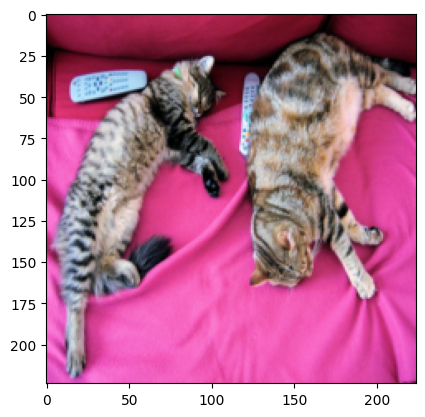

In [6]:
show_img = img.permute(1,2,0)
plt.imshow(show_img)

In [7]:
img = img / 255.0
attention = visualize_attention(net,img,patch_size = 16,device = device)

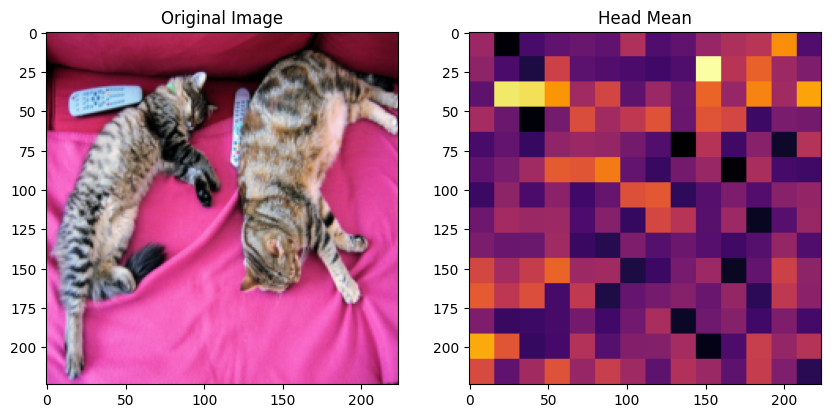

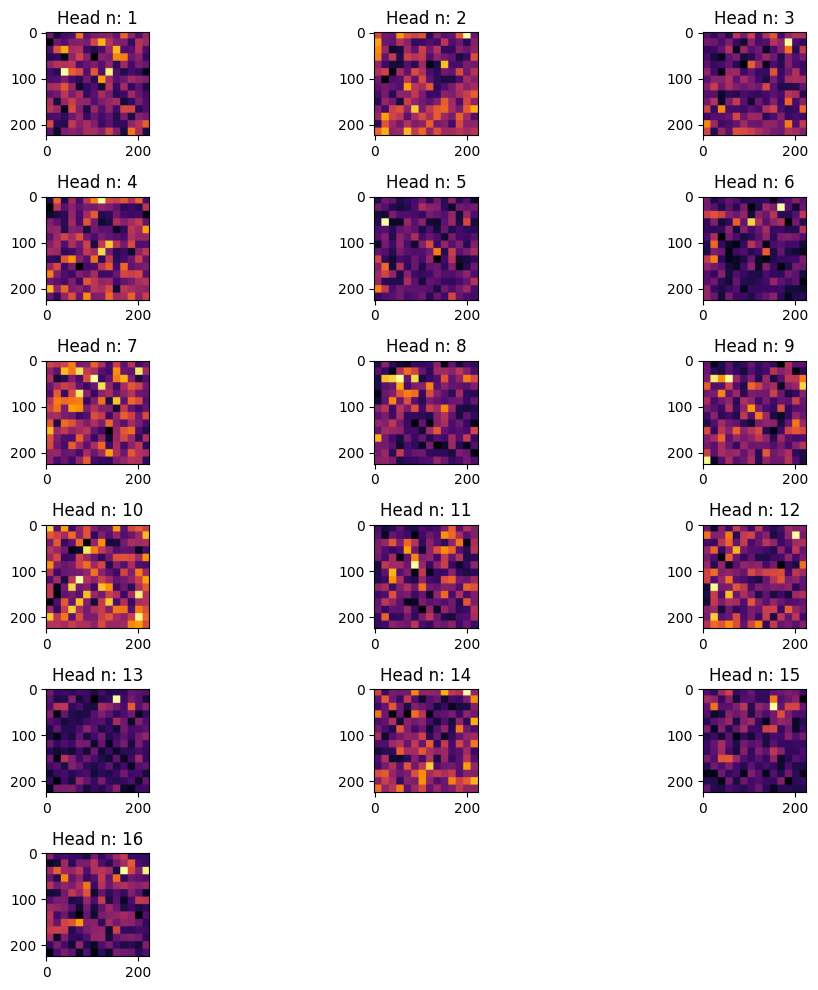

In [8]:
plot_attention(img.permute(1,2,0),attention)